# Supervised Learning - Regression

## Agenda
- Types of Regression
  - Linear Regression
    - Simple Linear Regression
      - Train Test Split
    - Multiple Linear Regression
      - Overfitting and Underfitting
  - Non Linear Regression
    - Polynomial Regression
- Model Evaluation and Validation
   - Cross Validation Techniques
   - Performance metrics in Regression
     - Mean Squared Error (MSE)
     - Mean Absolute Error (MAE)
     - Root Mean Squared Error (RMSE)
     - R-Squared
- Regularization Techniques
  -  Lasso Regression
  -  Ridge Regression
- Hyperparameter Tuning
  - GridSearchCV
  - RandomSearchCV
- Pipelines
  - sci-kit learn pipelines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)
x =  np.random.normal(0,1, 100)
y = -2*x + np.random.rand(100)

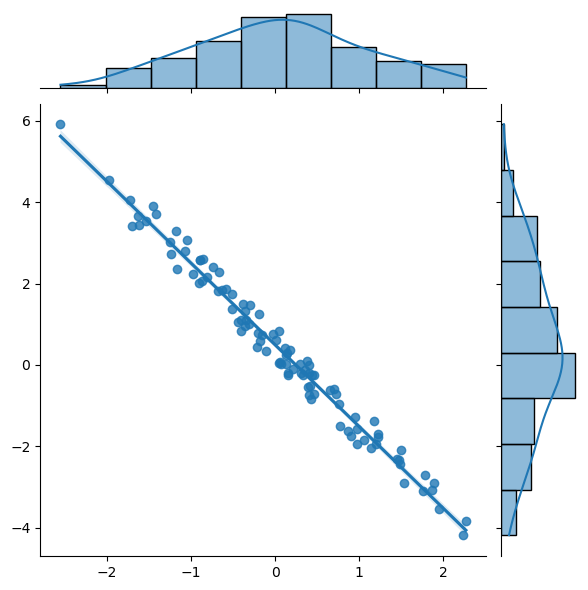

In [3]:
sns.jointplot(x=x, y = y, kind = 'reg')
plt.show()

# Types of Regression
There are two types of linear regression:
- Simple linear regression
- Multiple linear regression

### __3.4.1 Simple Linear Regression__ ###**Simple Linear Regression**Definition: Simple linear regression models the relationship between one independent variable and the dependent variable as a straight line.The equation for Simple Linear Regression is: $$ y = \beta_0 + \beta_1x $$where:- $y$ is the dependent variable- $x$ is the independent variable- $β_0$ is the intercept- $β_1$ is the slope

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Simple_linear_regression.jpg)

### __3.4.2 Multiple Linear Regression__ ###
**Multiple Linear Regression**
Definition: Multiple linear regression models the relationship between two or more independent variables/predictors/features and the dependent variable as a straight line.
The equation for Multiple Linear Regression:
 $$ {y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_ n $$
- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.

In [4]:
# Let us see how to fit a Simple Linear Regression model on a dataset

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read the dataset

df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
# Display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


There are no missing values in the dataset.

In [8]:
# Seggregate the input feature and target in variable X, y respectively.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
# Perform Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.index

Index([ 79, 197,  38,  24, 122, 195,  29,  19, 143,  86,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=160)

In [12]:
y_train.index

Index([ 79, 197,  38,  24, 122, 195,  29,  19, 143,  86,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=160)

In [13]:
# Lets fit(Train) the model

In [14]:
# Import LinearRegression Model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [15]:
# Create an instance of LinearRegression Class
lin_reg = LinearRegression()

In [16]:
lin_reg

LinearRegression()

In [17]:
lin_reg.fit(X_train, y_train)  
# At this step the model learns the realtionship between input and the output and finds the trained parameters
# (Coef. of regression & the Intercept)

LinearRegression()

In [18]:
#Sales  = 7.1196384305929525 + 0.04652973 * TV
print(f'The Coefficient of Regression for TV is {lin_reg.coef_}')
print(f'The Intercept is {lin_reg.intercept_}')

The Coefficient of Regression for TV is [0.04652973]
The Intercept is 7.1196384305929525


In [19]:
y_test_predicted = lin_reg.predict(X_test)

In [20]:
y_test_predicted[:5]

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877])

In [21]:
y_test[:5]

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

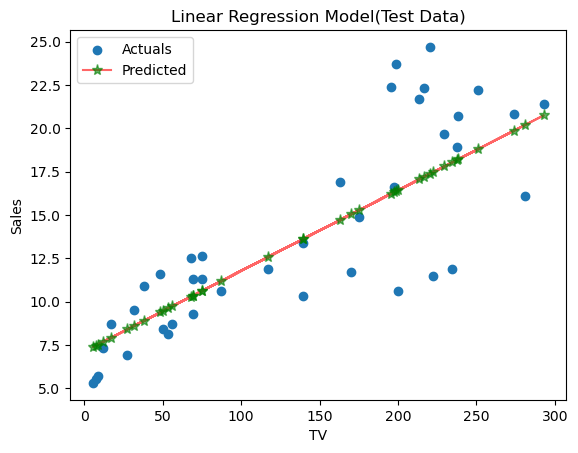

In [22]:
plt.scatter(X_test,y_test, label = 'Actuals')
plt.plot(X_test,y_test_predicted, color = 'red', label = 'Predicted', marker = '*', mfc = 'green',
         ms = 8, mec = 'green', alpha = 0.6)
plt.legend(loc = 'upper left')
plt.title('Linear Regression Model(Test Data)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

### Overfitting and Underfitting
When developing machine learning models, achieving the right balance between complexity and simplicity is crucial. This balance is covered in the concepts of overfitting and underfitting.

**Overfitting**
- Overfitting occurs when a model learns the noise and details in the training data too well to the extent that it negatively impacts its performance on new unseen data.
- Sign: High accuracy on training data but poor accuracy on test data.
- Cause: Model is too complex (too many parameters).
  
**Underfitting**
- Underfitting happens when a model is too simple to capture the underlying pattern of the data.
- Sign: Poor accuracy on both training and test data.
- Cause: Model is too simple (too few parameters).

**Bias-Variance Tradeoff**
- Bias: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause underfitting.- Variance: Error due to excessive complexity in the learning algorithm. High variance can cause overfitting.
**Tradeoff**- Low Bias & High Variance: Model fits the training data very well but may fail to generalize (overfitting).- High Bias & Low Variance: Model does not fit the training data well and misses the underlying trend (underfitting).- Optimal Tradeoff: Finding a balance where the model performs well on both training and test data, minimizing overall error.  Understanding and managing the bias-variance tradeoff is key to building models that generalize well to unseen data.

In [23]:
# Lets Look How to check for overfittig and underfitting

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
y_test_predicted = lin_reg.predict(X_test)
y_train_predicted = lin_reg.predict(X_train)

In [26]:
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predicted)


In [27]:
print(f'Training MSE {mse_train:.3f}')
print(f'Test MSE {mse_test:.3f}')
print(f'Training R2 {r2_train:.3f}')
print(f'Test R2 {r2_test:.3f}')

Training MSE 10.604
Test MSE 10.205
Training R2 0.591
Test R2 0.677


In [28]:
# Check for overfitting or underfitting
if mse_train < mse_test or r2_train > r2_test:
    if abs(r2_train - r2_test) > 0.1:
        print("Model may be overfitting to the training data.")
    else:
        print("Model performs reasonably well but check for slight overfitting.")
elif mse_train > mse_test and r2_train < r2_test:
    print("Model may be underfitting, consider increasing model complexity.")
else:
    print("Model has a balanced fit on both training and testing datasets.")

Model may be underfitting, consider increasing model complexity.


**Observation**
 Mean Squared Error (MSE) and R-squared (R²) values are calculated for both training and test datasets.
 - MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.
 - R² provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model
Overfitting: The model performs well on the training data but poorly on the test data (higher R² on training or lower MSE on training compared to testing).
Underfitting: The model performs poorly on both training and test data, or better on the test data compared to the training data, which could suggest that the model is too simple.

# Non Linear Regression
## Polynomial Regression

**Polynomial Regression** is a subset of linear regression that includes polynomial terms.The relationship between an independent variable (x) and a dependent variable (y) is modeled as an nth-degree polynomia

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Polynomial.png)

- Polynomial regression is also called as the special case of multiple linear regression. Some polynomial terms are added to the multiple linear regression equation to convert into polynomial regression.
- It is a linear model with some modifications made to increase its accuracy.
- The dataset used in polynomial regression for training is non-linear.

## Steps

First, import the relevant libraries.
- Next, assign the **PolynomialFeatures** of degree 8 to the variable **poly_features**.
- Fit the values of X_test and X_train  and assign them to the variable **X_test_poly** and **X_train_poly**.
- Finally, get the linear regression function and assign it to the variable **pol_features**.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_features = PolynomialFeatures(degree = 5)
poly_features.fit(X_train)
X_train_poly =  poly_features.transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [31]:
lin_reg_poly =  LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [32]:
y_train_pred_poly = lin_reg_poly.predict(X_train_poly)
y_test_pred_poly = lin_reg_poly.predict(X_test_poly)

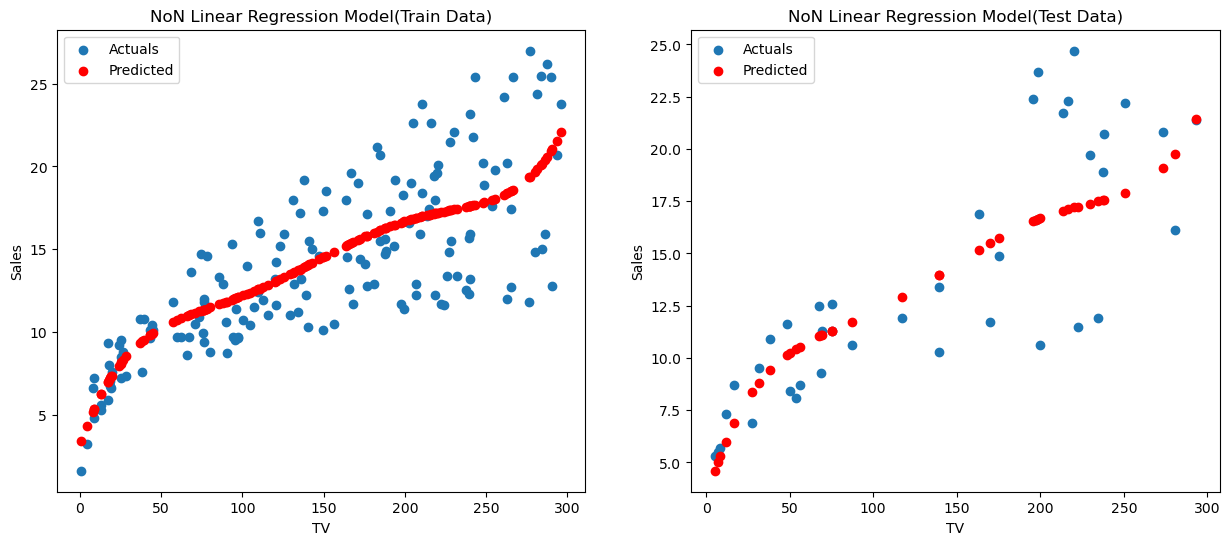

In [33]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
plt.scatter(X_train['TV'],y_train, label = 'Actuals')
plt.scatter(X_train['TV'],y_train_pred_poly, color = 'red', label = 'Predicted')
plt.legend(loc = 'upper left')
plt.title('NoN Linear Regression Model(Train Data)')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,2,2)
plt.scatter(X_test['TV'],y_test, label = 'Actuals')
plt.scatter(X_test['TV'],y_test_pred_poly, color = 'red', label = 'Predicted')
plt.legend(loc = 'upper left')
plt.title('NoN Linear Regression Model(Test Data)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [34]:
mse_train = mean_squared_error(y_train, y_train_pred_poly)
mse_test = mean_squared_error(y_test, y_test_pred_poly)
r2_train = r2_score(y_train, y_train_pred_poly)
r2_test = r2_score(y_test, y_test_pred_poly)

print(f'Training MSE {mse_train:.3f}')
print(f'Test MSE {mse_test:.3f}')
print(f'Training R2 {r2_train:.3f}')
print(f'Test R2 {r2_test:.3f}')

Training MSE 10.066
Test MSE 10.205
Training R2 0.612
Test R2 0.677


# Model Evaluation and Validation Techniques
## Performance Metrics
In Regression, Evaluation metrics gives the quantitative measures of models performance, which helps in assessing and selection of the models. The key metrics are :

### Mean Squared Error (MSE) 
it calculates the average of the squares of the errors, which are the differencs between actual values and the predicted values. A lower value of MSE suggest a better model performance. Mathematically, 
$$ MSE =  \frac{\sum_{i=1}^n {(y_{i} - \hat{y_i})}^2}{n}
$$

where, 

$$
\hat{y_i} =  \beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}
$$

or We can rewrite :
$$
MSE =   \frac{\sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2}{n}
$$

where

- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output

### Root Mean Squared Error (RMSE) 
RMSE is the square root of MSE, providing the measure of the average magnitude of the errors in the predicted values. Since the sqaure root reverses the squaring operation of MSE, RMSE ends up having the same units as the original target variables. Mathemtically

$$
RMSE =   \sqrt{\frac{\sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2}{n}}
$$

where

- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output

### Mean Absolute Error (MAE)
MAE calculates the average of the absolute errors between actual and predicted values. it is less sensitive  to outliers as compared MSE and RMSE, Mathematically

$$
MAE =   \frac{\sum_{i=1}^n |(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))|}{n}
$$



### R - Squared (R2)

R - Squared explains how much the variation of the dependent variable `y` can be attributed to changes in independent variable `x`. R Squared value ranges between (0-1)

- **0** - This indicates that the model explains none of the variance in the dependent variable. The dependent variable has no explanatory powers for the changes in target variable
- **1** -  This represents a perfect fit. The model explains all of the variance in the dependent variable. The changes in `y` are perfectly captured by changes in `x`

While a higher R2 Score generally suggest that a model is a better fit, but it needs to be considered along with other metrics like MSE, RMSE or MAE

Mathematically.

$$
\text{R-Sqaured (r2 score)} =  1 - \frac{\text{RSS}}{\text{TSS}}
$$


where
$$
\text{RSS or SSR or Residual Sum of Sqaures} =  \sum_{i=1}^n {(y_{i} - (\beta_{0} + \sum_{j=1}^{p} \beta_{j}x_{j}))}^2
$$

$$
\text{TSS or SST or Total Sum of Sqaures} =  \sum_{i=1}^n {(y_{i} - \overline{y})}^2
$$

where

- $n$ is the number of observations
- $p$ is the number of input features
- $x$ is input feature values
- $y$ is actual output
- $\hat{y}$ is predicted output
- $\overline{y}$ is mean of the target variable


## Cross Validation Technique

Cross-validation is a machine learning technique that evaluates model performance on unseen data by dividing the data into multiple folds. In each iteration, one fold is used as a validation set and the remaining as training data. This process is repeated such that each fold serves as the validation set once. The results from all iterations are averaged to provide a robust estimate of model performance. Some of the common cross-validation techniques are:

**1. K-Fold Cross-Validation**
In K-Fold Cross validation, the dataset is divided into k equally sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used exactly once as the test set. The results are averaged to produce a single performance estimate.
* Pros: Provides a more accurate estimate of model performance.
* Cons: Computationally intensive for large datasets.

**2. Stratified K-Fold Cross-Validation**Similar to K-Fold but ensures that each fold has the same proportion of different classes as the original dataset. This is especially useful for imbalanced datasets.* Pros: More reliable performance estimates for imbalanced datasets.* Cons: Still computationally intensive.

**Now, Lets build a regression model, perform analysis on it, and evaluate the models performance**

In [38]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# read the dataset
df =  pd.read_csv('housing_with_ocean_proximity.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [42]:
# Display the statistical summary
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# ocean_proximity sis a categorical variable for which we would do One Hot Encoding using get Dummies

In [44]:
# Missing Values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [45]:
# There are 207 missing values in total_bedrooms, which is approximately 1% of total. 
# replace missing values with the median value.

In [46]:
df['total_bedrooms'] =  df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [47]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [48]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [49]:
# Apply get_dummies of dataframe, with drop_first True, with prefix 'op', and dtype int

df = pd.get_dummies(df, drop_first =True, prefix ='op', dtype = 'int')

In [50]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0


In [51]:
# Split the data in Feature and target and perform train test split in 70:30

X =  df.drop(columns = ['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =  0.3, random_state = 25)

In [52]:
# Create KFold Validations
# n_splits- number of folds to be created
# shuffle -  shuffles the data before splitting
# random_state - ensure reproducible shuffling

In [53]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 25)

In [54]:
# Initialize Model
model =  LinearRegression()

- cross_val_score: - Evaluate the model using cross validation
- model: the ML model to evaluate
- X_train, y_train : train feature and target
- scoring - used to toevaluate validation sets on a metric

In [56]:
k_fold_scores = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = kf)
print(k_fold_scores)
print(f' The average validation r2 score is {k_fold_scores.mean():.4f}')

[0.64903686 0.65700771 0.57703987 0.64447375 0.65028899 0.65056426
 0.62998423 0.63084079 0.65222269 0.67534486]
 The average validation r2 score is 0.6417


In [57]:
#Evaluate the model on test set

In [59]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print(f"MSE Train {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"MSE Test {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"MAE Train {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE Test {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"R2 Train {r2_score(y_train, y_train_pred):.3f}")
print(f"R2 Test {r2_score(y_test, y_test_pred):.3f}")
print(f"RMSE Train {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"RMSE Test {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")

MSE Train 4736115155.057
MSE Test 4697911668.218
MAE Train 49757.182
MAE Test 50042.280
R2 Train 0.644
R2 Test 0.648
RMSE Train 68819.439
RMSE Test 68541.314


In [60]:
y_test[:5]

73        67500.0
8944     461100.0
3737     286000.0
19092    201800.0
9493     151400.0
Name: median_house_value, dtype: float64

In [61]:
y_test_pred[:5]

array([111681.27621579, 219838.05844271, 236645.13226791, 300773.1860442 ,
       194143.94846698])